In [3]:
from random import randint #to get random values
from time import sleep #to sleep the algorithm while scraping websites
import requests #requests module to requests information from websites
from bs4 import BeautifulSoup
import pandas as pd #for dataframe 
import numpy as np #for numerical analysis

name = []
apartment_price = []
completion_stage = []
agent_contact = []
day_posted = []
rent_location = []


URL = 'https://www.propertypro.ng/property-for-rent/in/abuja?page='
for page in range(1,550):
    req = requests.get(URL + str(page))
    #html_ = requests.get('https://www.propertypro.ng/property-for-rent/in/abuja').text
    #create an instance of beautifulsoup
    soup = BeautifulSoup(req.text, 'lxml')
    apartments = soup.find_all('div', class_ ='single-room-sale listings-property')
    #get and find infomation about unique properties
    #locat = soup.find_all('div', class_ = 'single-room-img result-img')

    for apartment in apartments:
        try:
            title  = apartment.find('h4', class_= 'listings-property-title').text
        except:
            title = None
        try:
            price = apartment.find('h3', class_ = 'listings-price').text
        except:
            price = None
        try:
            furnishing = apartment.find('div', class_ = 'furnished-btn').text.replace('\n','')
        except:
            furnishing = None
        try:
            agent_no = apartment.find('div', class_ = 'phone-icon').text.replace('\n','')
        except:
            agent_no = None
        try:
            date_posted = apartment.find('div', class_ = 'single-room-text').h5.text
        except:
            date_posted = None
        try:
            location = apartment.find('div', class_ = 'single-room-img result-img').img['title']
        except:
            location = None
        name.append(title)
        apartment_price.append(price)
        completion_stage.append(furnishing)
        agent_contact.append(agent_no)
        day_posted.append(date_posted)
        rent_location.append(location)
    sleep(randint(2,10))

ChunkedEncodingError: ("Connection broken: ConnectionAbortedError(10053, 'An established connection was aborted by the software in your host machine', None, 10053, None)", ConnectionAbortedError(10053, 'An established connection was aborted by the software in your host machine', None, 10053, None))

In [2]:
import pandas as pd
df = pd.DataFrame()
df['name'] = name
df['apartment_price'] = apartment_price
df['completion_stage'] = completion_stage
df['agent_contact'] = agent_contact
df['day_posted'] = day_posted
df['rent_location'] =  rent_location
df

NameError: name 'name' is not defined

In [3]:
df['apartment_price']

0         ₦ 16,500,000/year 
1          ₦ 6,000,000/year 
2               ₦ 4,500,000 
3          ₦ 9,000,000/year 
4          ₦ 7,000,000/year 
                ...         
10975           ₦ 2,500,000 
10976           ₦ 2,600,000 
10977           ₦ 1,500,000 
10978           ₦ 1,650,000 
10979           ₦ 1,500,000 
Name: apartment_price, Length: 10980, dtype: object

In [ ]:

#continue

In [6]:
df.to_csv('file2.csv')

In [4]:
#data cleaning, converting string to float.
df['apartment_price'] = df['apartment_price'].replace({' ': ''})


In [5]:
df['apartment_price']

0         ₦ 16,500,000/year 
1          ₦ 6,000,000/year 
2               ₦ 4,500,000 
3          ₦ 9,000,000/year 
4          ₦ 7,000,000/year 
                ...         
10975           ₦ 2,500,000 
10976           ₦ 2,600,000 
10977           ₦ 1,500,000 
10978           ₦ 1,650,000 
10979           ₦ 1,500,000 
Name: apartment_price, Length: 10980, dtype: object

In [6]:
#df['apartment_price'] = df['apartment_price'].str.replace(' ', '')
df['apartment_price'] = df['apartment_price'].str.replace(',', '')
df['apartment_price'] = df['apartment_price'].str.replace('₦', '')
df['apartment_price']
#df['name'] = df['name'].str.replace(' ', '_')

0          16500000/year 
1           6000000/year 
2                4500000 
3           9000000/year 
4           7000000/year 
               ...       
10975            2500000 
10976            2600000 
10977            1500000 
10978            1650000 
10979            1500000 
Name: apartment_price, Length: 10980, dtype: object

In [7]:
#replace values per year by null
df['apartment_price'] = df['apartment_price'].str.replace('/year', '')
df['apartment_price']

0          16500000 
1           6000000 
2           4500000 
3           9000000 
4           7000000 
            ...     
10975       2500000 
10976       2600000 
10977       1500000 
10978       1650000 
10979       1500000 
Name: apartment_price, Length: 10980, dtype: object

In [296]:
#replace all space within the rice
#check unique data 
df['apartment_price'].unique()


array(['  2500000 ', '  450000 ', '  1300000 ', '  2250000 ',
       '  15000000 ', '  2000000 ', '  35000000 ', '  1700000 ',
       '  5500000 ', '  7000000 ', '  9000000 ', '  6500000 ',
       '  5000000 ', '  25000000 ', '  1500000 ', '  2900000 ',
       '  600000 ', '  6000000 ', '  16500000 ', '  4500000 ',
       '  12000000 ', ' $ 43000 ', '  2200000 ', '  10000000 ',
       '  4000000 ', '  16000000 ', '  3000000 ', '  8000000 ',
       '  30000000 ', '  8500000 ', '  3500000 ', '  850000 ',
       '  1400000 ', '  1200000 ', '  350000 ', '  100000000 ',
       '  1100000 ', '  17000000 ', '  400 ', '  1000000 ', '  250000 ',
       '  400000 ', '  1900000 ', '  700000 ', '  1800000 ',
       '  20000000 ', '  4100000 ', '  12800000 ', '  14000000 ',
       '  500000 ', '  2400000 ', ' $ 65000 ', '  13000000 ',
       '  2800000 ', '  7350000 ', '  150000000 ', '  40000000 ',
       '  4200000 ', '  30000/sqm ', '  80000000 ', '  800000 ',
       '  320000 ', '  32000000 ', 

In [8]:
#replace tabs and space 
df['apartment_price'] = df['apartment_price'].str.replace(' ', '')
df['apartment_price'].unique()

array(['16500000', '6000000', '4500000', '9000000', '7000000', '50000',
       '5000000', '2500000', '$43000', '12000000', '2000000', '8000000',
       '2900000', '10000000', '4000000', '20000000', '2250000',
       '25000000', '7500000', '5500000', '6500000', '3800000', '1500000',
       '2200000', '3500000', '2700000', '$50000', '1600000', '1900000',
       '1000000', '3000000', '8500000', '30000000', '15000000', '1700000',
       '1200000', '1800000', '1100000', '17000000', '100000000', '800000',
       '500000', '850000', '$54000', '700000', '2600000', '350000',
       '450000', '250000', '3400000', '13000000', '2400000', '$65000',
       '14000000', '1300000', '750000', '30000/sqm', '9100000',
       '40000000', '400000', '35000000', '320000', '650000', '2300000',
       '6100000', '11000000', '300000', '2800000', '900000', '550000',
       '50000000', '3250000', '12500000', '1400000', '120000000',
       '600000', '150000', '25000/sqm', '16000000', '7615000', '18000000',
       '

In [9]:
#clean and remove data with inconsistent price values (dollars, rent paid per day, per month)
#this code removed data for rent calculated per sqkm
#continue the code running from here
df.loc[df['apartment_price'].str.contains(r'([sqm]$.*)')]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,name,apartment_price,completion_stage,agent_contact,day_posted,rent_location
212,CO WORKING SPACE FOR RENT,30000/sqm,Serviced,08056267437,"Updated 02 Jul 2022, Added 02 Jun 2022",Co working space for rent Wuse Zone 5 Wuse 1 A...
450,COMMERCIAL PROPERTY FOR RENT,25000/sqm,Serviced,08111113467,"Updated 02 Jul 2022, Added 18 Mar 2022",Commercial Property for rent Central Business ...
480,COMMERCIAL PROPERTY FOR RENT,30000/sqm,,08034511039,"Updated 02 Jul 2022, Added 07 Jun 2022",Commercial Property for rent Zone 5 Wuse 1 Abuja
523,COMMERCIAL PROPERTY FOR RENT,35000/sqm,Serviced,07056144444,"Updated 27 Jun 2022, Added 07 Mar 2022",Commercial Property for rent Central Area Cent...
540,COMMERCIAL PROPERTY FOR RENT,15000/sqm,,08028761350,"Updated 03 Jul 2022, Added 08 Oct 2021",Commercial Property for rent Idu Abuja
590,COMMERCIAL PROPERTY FOR RENT,55000/sqm,,09080088779,"Updated 02 Jul 2022, Added 04 Mar 2022",Commercial Property for rent Central Area Abuja
714,COMMERCIAL PROPERTY FOR RENT,35000/sqm,Serviced,09080088779,"Updated 02 Jul 2022, Added 17 Aug 2021",Commercial Property for rent Garki 2 Abuja
718,COMMERCIAL PROPERTY FOR RENT,100000/sqm,Serviced,09080088779,"Updated 02 Jul 2022, Added 24 Sep 2021",Commercial Property for rent Wuse 2 Abuja
733,COMMERCIAL PROPERTY FOR RENT,100000/sqm,Serviced,09080088779,"Updated 02 Jul 2022, Added 10 Aug 2021",Commercial Property for rent Wuse 2 Abuja
738,COMMERCIAL PROPERTY FOR RENT,75000/sqm,Newly Built,09080088779,"Updated 02 Jul 2022, Added 05 Nov 2021",Commercial Property for rent Garki 2 Abuja


In [10]:
df.drop(df.loc[df['apartment_price'].str.contains(r'([sqm]$.*)')].index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [11]:
#cleaning the dataset
#extract rent paid per month
filt_month = df['apartment_price'].str.contains(r'([month]$.*)')
df.drop(df.loc[filt_month].index, inplace = True)

In [12]:
df['apartment_price'].unique()

array(['16500000', '6000000', '4500000', '9000000', '7000000', '50000',
       '5000000', '2500000', '$43000', '12000000', '2000000', '8000000',
       '2900000', '10000000', '4000000', '20000000', '2250000',
       '25000000', '7500000', '5500000', '6500000', '3800000', '1500000',
       '2200000', '3500000', '2700000', '$50000', '1600000', '1900000',
       '1000000', '3000000', '8500000', '30000000', '15000000', '1700000',
       '1200000', '1800000', '1100000', '17000000', '100000000', '800000',
       '500000', '850000', '$54000', '700000', '2600000', '350000',
       '450000', '250000', '3400000', '13000000', '2400000', '$65000',
       '14000000', '1300000', '750000', '9100000', '40000000', '400000',
       '35000000', '320000', '650000', '2300000', '6100000', '11000000',
       '300000', '2800000', '900000', '550000', '50000000', '3250000',
       '12500000', '1400000', '120000000', '600000', '150000', '16000000',
       '7615000', '18000000', '$40000', '3700000', '$35000', '48

In [13]:
df['apartment_price'] = df['apartment_price'].str.replace(' ', '')
df

,name,apartment_price,completion_stage,agent_contact,day_posted,rent_location
0,FLAT / APARTMENT FOR RENT,16500000,,08053979149,"Updated 03 Jul 2022, Added 15 Mar 2022",Flat / Apartment for rent Maitama Abuja
1,5 BEDROOM HOUSE FOR RENT,6000000,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 15 Jun 2022",5 bedroom House for rent American Internationa...
2,COMMERCIAL PROPERTY FOR RENT,4500000,Newly Built,08053979149,"Updated 03 Jul 2022, Added 14 Dec 2021",Commercial Property for rent Close To Coza Chu...
3,4 BEDROOM HOUSE FOR RENT,9000000,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 09 May 2022",4 bedroom House for rent Garki 2 Abuja
4,4 BEDROOM HOUSE FOR RENT,7000000,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 28 Jun 2022",4 bedroom House for rent Close To Wuye Market ...
...,...,...,...,...,...,...
10975,3 BEDROOM FLAT / APARTMENT FOR RENT,2500000,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment for rent Garki 2 Abuja
10976,3 BEDROOM FLAT / APARTMENT FOR RENT,2600000,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment for rent Cadastal Z...
10977,3 BEDROOM FLAT / APARTMENT FOR RENT,1500000,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment for rent Utako Utak...
10978,2 BEDROOM FLAT / APARTMENT FOR RENT,1650000,,None,Added 08 Feb 2017,2 bedroom Flat / Apartment for rent Off Aminu ...


In [14]:
df['apartment_price'].unique()

array(['16500000', '6000000', '4500000', '9000000', '7000000', '50000',
       '5000000', '2500000', '$43000', '12000000', '2000000', '8000000',
       '2900000', '10000000', '4000000', '20000000', '2250000',
       '25000000', '7500000', '5500000', '6500000', '3800000', '1500000',
       '2200000', '3500000', '2700000', '$50000', '1600000', '1900000',
       '1000000', '3000000', '8500000', '30000000', '15000000', '1700000',
       '1200000', '1800000', '1100000', '17000000', '100000000', '800000',
       '500000', '850000', '$54000', '700000', '2600000', '350000',
       '450000', '250000', '3400000', '13000000', '2400000', '$65000',
       '14000000', '1300000', '750000', '9100000', '40000000', '400000',
       '35000000', '320000', '650000', '2300000', '6100000', '11000000',
       '300000', '2800000', '900000', '550000', '50000000', '3250000',
       '12500000', '1400000', '120000000', '600000', '150000', '16000000',
       '7615000', '18000000', '$40000', '3700000', '$35000', '48

In [15]:
#drop the rent paid in dollars 
df.drop(df.loc[df['apartment_price'].str.contains(r'(^\$.*)')].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [19]:
#regex to match apartment prices with sqkm, paid per day ()

df.loc[df['apartment_price'].str.contains(r'([day]$.*)')]
df.drop(df.loc[df['apartment_price'].str.contains(r'([day]$.*)')].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [20]:
df['apartment_price'].unique()

array(['16500000', '6000000', '4500000', '9000000', '7000000', '50000',
       '5000000', '2500000', '12000000', '2000000', '8000000', '2900000',
       '10000000', '4000000', '20000000', '2250000', '25000000',
       '7500000', '5500000', '6500000', '3800000', '1500000', '2200000',
       '3500000', '2700000', '1600000', '1900000', '1000000', '3000000',
       '8500000', '30000000', '15000000', '1700000', '1200000', '1800000',
       '1100000', '17000000', '100000000', '800000', '500000', '850000',
       '700000', '2600000', '350000', '450000', '250000', '3400000',
       '13000000', '2400000', '14000000', '1300000', '750000', '9100000',
       '40000000', '400000', '35000000', '320000', '650000', '2300000',
       '6100000', '11000000', '300000', '2800000', '900000', '550000',
       '50000000', '3250000', '12500000', '1400000', '120000000',
       '600000', '150000', '16000000', '7615000', '18000000', '3700000',
       '4800000', '4400000', '36000000', '13500000', '60000000', '9500

In [21]:
df.shape

(10897, 6)

In [17]:
df

,name,apartment_price,completion_stage,agent_contact,day_posted,rent_location
0,FLAT / APARTMENT FOR RENT,16500000,,08053979149,"Updated 03 Jul 2022, Added 15 Mar 2022",Flat / Apartment for rent Maitama Abuja
1,5 BEDROOM HOUSE FOR RENT,6000000,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 15 Jun 2022",5 bedroom House for rent American Internationa...
2,COMMERCIAL PROPERTY FOR RENT,4500000,Newly Built,08053979149,"Updated 03 Jul 2022, Added 14 Dec 2021",Commercial Property for rent Close To Coza Chu...
3,4 BEDROOM HOUSE FOR RENT,9000000,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 09 May 2022",4 bedroom House for rent Garki 2 Abuja
4,4 BEDROOM HOUSE FOR RENT,7000000,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 28 Jun 2022",4 bedroom House for rent Close To Wuye Market ...
...,...,...,...,...,...,...
10975,3 BEDROOM FLAT / APARTMENT FOR RENT,2500000,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment for rent Garki 2 Abuja
10976,3 BEDROOM FLAT / APARTMENT FOR RENT,2600000,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment for rent Cadastal Z...
10977,3 BEDROOM FLAT / APARTMENT FOR RENT,1500000,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment for rent Utako Utak...
10978,2 BEDROOM FLAT / APARTMENT FOR RENT,1650000,,None,Added 08 Feb 2017,2 bedroom Flat / Apartment for rent Off Aminu ...


In [22]:
#now convert apartment_price from string to float
#now convert apartment_price from string to float
df['apartment_price'] = df['apartment_price'].astype(float)
#view the dataframe
df['apartment_price']

0        16500000.0
1         6000000.0
2         4500000.0
3         9000000.0
4         7000000.0
            ...    
10975     2500000.0
10976     2600000.0
10977     1500000.0
10978     1650000.0
10979     1500000.0
Name: apartment_price, Length: 10897, dtype: float64

In [23]:
#drop unrealistic price like this, which might cause the data and analtyics skewed
df.drop(df.loc[df['apartment_price'] < 10].index, inplace = True)

In [24]:
#clean the location or address data within the dataframe
location = df['rent_location'].str.split(pat = 'for rent', expand = True)
df[['info', 'Location']] = location

In [25]:
#view the changes applied to the dataframe
df

,name,apartment_price,completion_stage,agent_contact,day_posted,rent_location,info,Location
0,FLAT / APARTMENT FOR RENT,16500000.0,,08053979149,"Updated 03 Jul 2022, Added 15 Mar 2022",Flat / Apartment for rent Maitama Abuja,Flat / Apartment,Maitama Abuja
1,5 BEDROOM HOUSE FOR RENT,6000000.0,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 15 Jun 2022",5 bedroom House for rent American Internationa...,5 bedroom House,American International School Durumi Abuja
2,COMMERCIAL PROPERTY FOR RENT,4500000.0,Newly Built,08053979149,"Updated 03 Jul 2022, Added 14 Dec 2021",Commercial Property for rent Close To Coza Chu...,Commercial Property,Close To Coza Church Guzape Abuja
3,4 BEDROOM HOUSE FOR RENT,9000000.0,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 09 May 2022",4 bedroom House for rent Garki 2 Abuja,4 bedroom House,Garki 2 Abuja
4,4 BEDROOM HOUSE FOR RENT,7000000.0,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 28 Jun 2022",4 bedroom House for rent Close To Wuye Market ...,4 bedroom House,Close To Wuye Market Wuye Abuja
...,...,...,...,...,...,...,...,...
10975,3 BEDROOM FLAT / APARTMENT FOR RENT,2500000.0,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment for rent Garki 2 Abuja,3 bedroom Flat / Apartment,Garki 2 Abuja
10976,3 BEDROOM FLAT / APARTMENT FOR RENT,2600000.0,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment for rent Cadastal Z...,3 bedroom Flat / Apartment,Cadastal Zone Durumi Abuja
10977,3 BEDROOM FLAT / APARTMENT FOR RENT,1500000.0,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment for rent Utako Utak...,3 bedroom Flat / Apartment,Utako Utako Abuja
10978,2 BEDROOM FLAT / APARTMENT FOR RENT,1650000.0,,None,Added 08 Feb 2017,2 bedroom Flat / Apartment for rent Off Aminu ...,2 bedroom Flat / Apartment,Off Aminu Kano Abuja


In [26]:
#drop columns full of redundant dataset
df.drop('rent_location', axis=1, inplace = True)


In [270]:
df

,name,apartment_price,completion_stage,agent_contact,day_posted,info,Location
0,1 BEDROOM FLAT / APARTMENT FOR RENT,2500000.0,Serviced,08147562407,Added 22 Jun 2022,1 bedroom Flat / Apartment,Asokoro Asokoro Abuja
1,FLAT / APARTMENT FOR RENT,450000.0,,08130263266,Added 21 Jun 2022,Flat / Apartment,Sahara4 Estate Lokogoma Tarred Road Lokogoma ...
2,2 BEDROOM HOUSE FOR RENT,1300000.0,,08039220606,"Updated 21 Jun 2022, Added 20 Jun 2022",2 bedroom House,Trademore Estate Lugbe Abuja
3,3 BEDROOM HOUSE FOR RENT,2250000.0,ServicedNewly Built,08053979149,Added 21 Jun 2022,3 bedroom House,Close To Turkey Hospital Idu Abuja
4,4 BEDROOM HOUSE FOR RENT,15000000.0,,07067964004,"Updated 21 Jun 2022, Added 16 Jun 2022",4 bedroom House,Wuse Zone 2 Abuja. Wuse 1 Abuja
...,...,...,...,...,...,...,...
7395,1 BEDROOM SELF CONTAIN FOR RENT,300000.0,,None,Added 18 Jun 2019,1 bedroom Self Contain,"airport Junction, Jabi Abuja"
7396,3 BEDROOM FLAT / APARTMENT FOR RENT,1250000.0,,None,Added 18 Jun 2019,3 bedroom Flat / Apartment,"directly Behind Lento Aluminum, Jabi Abuja"
7397,3 BEDROOM FLAT / APARTMENT FOR RENT,8000000.0,,None,Added 18 Jun 2019,3 bedroom Flat / Apartment,Jabi Abuja
7398,3 BEDROOM BLOCKS OF FLATS FOR RENT,2000000.0,,None,Added 18 Jun 2019,3 bedroom Blocks of Flats,Gwarinpa Gwarinpa Abuja


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10892 entries, 0 to 10979
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10892 non-null  object 
 1   apartment_price   10892 non-null  float64
 2   completion_stage  10892 non-null  object 
 3   agent_contact     1325 non-null   object 
 4   day_posted        10892 non-null  object 
 5   info              10892 non-null  object 
 6   Location          10892 non-null  object 
dtypes: float64(1), object(6)
memory usage: 680.8+ KB


In [28]:
#rename columns 
df['name'].unique()

array(['FLAT / APARTMENT FOR RENT', '5 BEDROOM HOUSE FOR RENT',
       'COMMERCIAL PROPERTY FOR RENT', '4 BEDROOM HOUSE FOR RENT',
       '2 BEDROOM HOUSE FOR RENT', '3 BEDROOM HOUSE FOR RENT',
       'HOUSE FOR RENT', '8 BEDROOM HOUSE FOR RENT',
       '6 BEDROOM HOUSE FOR RENT', '3 BEDROOM FLAT / APARTMENT FOR RENT',
       '1 BEDROOM FLAT / APARTMENT FOR RENT',
       '2 BEDROOM FLAT / APARTMENT FOR RENT',
       '5 BEDROOM FLAT / APARTMENT FOR RENT', 'LAND FOR RENT',
       '1 BEDROOM HOUSE FOR RENT', '7 BEDROOM HOUSE FOR RENT',
       '4 BEDROOM FLAT / APARTMENT FOR RENT', 'CO WORKING SPACE FOR RENT',
       '9 BEDROOM HOUSE FOR RENT',
       '5 BEDROOM DETACHED DUPLEX HOUSE FOR RENT',
       '10 BEDROOM HOUSE FOR RENT',
       '5 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       '4 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       '1 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       'TERRACED DUPLEX FOR RENT', 'MINI FLAT FOR RENT',
       'COMMERCIAL LAND FOR RENT', 'DETACHED DUPLEX FOR RENT

In [29]:
#for one bedroom apartment
df.loc[df['name'].str.contains(r'(^[1].*)')]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,name,apartment_price,completion_stage,agent_contact,day_posted,info,Location
40,1 BEDROOM FLAT / APARTMENT FOR RENT,1500000.0,,08160442385,"Updated 03 Jul 2022, Added 07 Jun 2022",1 bedroom Flat / Apartment,Jahi Abuja
56,1 BEDROOM FLAT / APARTMENT FOR RENT,1500000.0,,08160442385,"Updated 03 Jul 2022, Added 09 Jun 2022",1 bedroom Flat / Apartment,Jahi Abuja
58,1 BEDROOM FLAT / APARTMENT FOR RENT,2000000.0,Serviced,08160442385,"Updated 03 Jul 2022, Added 02 Jun 2022",1 bedroom Flat / Apartment,Apo Legislative Quarters Zone A Apo Abuja
69,1 BEDROOM FLAT / APARTMENT FOR RENT,1000000.0,,08067992859,"Updated 02 Jul 2022, Added 01 Jul 2022",1 bedroom Flat / Apartment,By Godab Life Camp Abuja
100,1 BEDROOM FLAT / APARTMENT FOR RENT,1100000.0,,08066627552,"Updated 02 Jul 2022, Added 15 Jun 2022",1 bedroom Flat / Apartment,Located In An Estate Opposite Citec Estate Da...
...,...,...,...,...,...,...,...
10859,1 BEDROOM FLAT / APARTMENT FOR RENT,600000.0,,None,Added 05 May 2017,1 bedroom Flat / Apartment,"Zone B, Apo Resettlement, Abuja. Abuja"
10881,1 BEDROOM FLAT / APARTMENT FOR RENT,180000.0,,None,Added 15 Apr 2017,1 bedroom Flat / Apartment,Abacha Road Mararaba Karu Sub-Urban District ...
10928,1 BEDROOM FLAT / APARTMENT FOR RENT,1000000.0,,None,Added 02 Mar 2017,1 bedroom Flat / Apartment,Zone 6 Abuja
10933,1 BEDROOM FLAT / APARTMENT FOR RENT,450000.0,,None,Added 28 Feb 2017,1 bedroom Flat / Apartment,Arab Road Kubwa Sub-Urban District Abuja


In [39]:
df['name'].unique()


array(['3 BEDROOM FLAT / APARTMENT FOR RENT', '3 BEDROOM HOUSE FOR RENT',
       '4 BEDROOM HOUSE FOR RENT', 'FLAT / APARTMENT FOR RENT',
       '2 BEDROOM FLAT / APARTMENT FOR RENT', 'LAND FOR RENT',
       '6 BEDROOM HOUSE FOR RENT', 'COMMERCIAL PROPERTY FOR RENT',
       'HOUSE FOR RENT', '1 BEDROOM FLAT / APARTMENT FOR RENT',
       '9 BEDROOM HOUSE FOR RENT', '5 BEDROOM HOUSE FOR RENT',
       '8 BEDROOM HOUSE FOR RENT', '4 BEDROOM FLAT / APARTMENT FOR RENT',
       '7 BEDROOM HOUSE FOR RENT', '2 BEDROOM HOUSE FOR RENT',
       '1 BEDROOM HOUSE FOR RENT', '5 BEDROOM FLAT / APARTMENT FOR RENT',
       'CO WORKING SPACE FOR RENT',
       '5 BEDROOM DETACHED DUPLEX HOUSE FOR RENT',
       '4 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       '10 BEDROOM HOUSE FOR RENT',
       '5 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       'TERRACED DUPLEX FOR RENT', 'MINI FLAT FOR RENT',
       'COMMERCIAL LAND FOR RENT', 'DETACHED DUPLEX FOR RENT',
       'OFFICE SPACE FOR RENT', 'SELF CONTAIN FOR REN

In [37]:
#to create a distinction between one bedroom and self contain
#create a group for one bedroom nd look for self contain within the grouped dat
df.loc[df['name'].str.contains(r'(^[1].*)')]

,name,apartment_price,completion_stage,agent_contact,day_posted,info,Location
40,1 BEDROOM FLAT / APARTMENT FOR RENT,1500000.0,,08160442385,"Updated 03 Jul 2022, Added 07 Jun 2022",1 bedroom Flat / Apartment,Jahi Abuja
56,1 BEDROOM FLAT / APARTMENT FOR RENT,1500000.0,,08160442385,"Updated 03 Jul 2022, Added 09 Jun 2022",1 bedroom Flat / Apartment,Jahi Abuja
58,1 BEDROOM FLAT / APARTMENT FOR RENT,2000000.0,Serviced,08160442385,"Updated 03 Jul 2022, Added 02 Jun 2022",1 bedroom Flat / Apartment,Apo Legislative Quarters Zone A Apo Abuja
69,1 BEDROOM FLAT / APARTMENT FOR RENT,1000000.0,,08067992859,"Updated 02 Jul 2022, Added 01 Jul 2022",1 bedroom Flat / Apartment,By Godab Life Camp Abuja
100,1 BEDROOM FLAT / APARTMENT FOR RENT,1100000.0,,08066627552,"Updated 02 Jul 2022, Added 15 Jun 2022",1 bedroom Flat / Apartment,Located In An Estate Opposite Citec Estate Da...
...,...,...,...,...,...,...,...
10859,1 BEDROOM FLAT / APARTMENT FOR RENT,600000.0,,None,Added 05 May 2017,1 bedroom Flat / Apartment,"Zone B, Apo Resettlement, Abuja. Abuja"
10881,1 BEDROOM FLAT / APARTMENT FOR RENT,180000.0,,None,Added 15 Apr 2017,1 bedroom Flat / Apartment,Abacha Road Mararaba Karu Sub-Urban District ...
10928,1 BEDROOM FLAT / APARTMENT FOR RENT,1000000.0,,None,Added 02 Mar 2017,1 bedroom Flat / Apartment,Zone 6 Abuja
10933,1 BEDROOM FLAT / APARTMENT FOR RENT,450000.0,,None,Added 28 Feb 2017,1 bedroom Flat / Apartment,Arab Road Kubwa Sub-Urban District Abuja


In [30]:
import numpy as np
self_filt = df['name'].str.contains(r'(^SELF.*)')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [38]:
#df.loc[df['First Season'] > 1990, 'First Season'] = 1
df.loc[self_filt, 'name'] ="Self_contain"
df['name'].unique()

array(['FLAT / APARTMENT FOR RENT', '5 BEDROOM HOUSE FOR RENT',
       'COMMERCIAL PROPERTY FOR RENT', '4 BEDROOM HOUSE FOR RENT',
       '2 BEDROOM HOUSE FOR RENT', '3 BEDROOM HOUSE FOR RENT',
       'HOUSE FOR RENT', '8 BEDROOM HOUSE FOR RENT',
       '6 BEDROOM HOUSE FOR RENT', '3 BEDROOM FLAT / APARTMENT FOR RENT',
       '1 BEDROOM FLAT / APARTMENT FOR RENT',
       '2 BEDROOM FLAT / APARTMENT FOR RENT',
       '5 BEDROOM FLAT / APARTMENT FOR RENT', 'LAND FOR RENT',
       '1 BEDROOM HOUSE FOR RENT', '7 BEDROOM HOUSE FOR RENT',
       '4 BEDROOM FLAT / APARTMENT FOR RENT', 'CO WORKING SPACE FOR RENT',
       '9 BEDROOM HOUSE FOR RENT',
       '5 BEDROOM DETACHED DUPLEX HOUSE FOR RENT',
       '10 BEDROOM HOUSE FOR RENT',
       '5 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       '4 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       '1 BEDROOM COMMERCIAL PROPERTY FOR RENT',
       'TERRACED DUPLEX FOR RENT', 'MINI FLAT FOR RENT',
       'COMMERCIAL LAND FOR RENT', 'DETACHED DUPLEX FOR RENT

In [98]:
df['name'] 

0        3 BEDROOM FLAT / APARTMENT FOR RENT
1                   3 BEDROOM HOUSE FOR RENT
2                   4 BEDROOM HOUSE FOR RENT
3                  FLAT / APARTMENT FOR RENT
4        3 BEDROOM FLAT / APARTMENT FOR RENT
                        ...                 
10975                         HOUSE FOR RENT
10976                         HOUSE FOR RENT
10977                         HOUSE FOR RENT
10978                         HOUSE FOR RENT
10979                         HOUSE FOR RENT
Name: name, Length: 10894, dtype: object

In [40]:
#filter column by one bedroom
one_filt = df['name'].str.contains(r'(^1\s+)')
#df.loc[one_filt, 'name'] ="One_bedroom"
df.loc[one_filt, 'name'] = "One_bedroom"




C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [41]:
#df.loc[df['name'] == 'One_bedroom']
df


,name,apartment_price,completion_stage,agent_contact,day_posted,info,Location
0,FLAT / APARTMENT FOR RENT,16500000.0,,08053979149,"Updated 03 Jul 2022, Added 15 Mar 2022",Flat / Apartment,Maitama Abuja
1,5 BEDROOM HOUSE FOR RENT,6000000.0,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 15 Jun 2022",5 bedroom House,American International School Durumi Abuja
2,COMMERCIAL PROPERTY FOR RENT,4500000.0,Newly Built,08053979149,"Updated 03 Jul 2022, Added 14 Dec 2021",Commercial Property,Close To Coza Church Guzape Abuja
3,4 BEDROOM HOUSE FOR RENT,9000000.0,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 09 May 2022",4 bedroom House,Garki 2 Abuja
4,4 BEDROOM HOUSE FOR RENT,7000000.0,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 28 Jun 2022",4 bedroom House,Close To Wuye Market Wuye Abuja
...,...,...,...,...,...,...,...
10975,3 BEDROOM FLAT / APARTMENT FOR RENT,2500000.0,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment,Garki 2 Abuja
10976,3 BEDROOM FLAT / APARTMENT FOR RENT,2600000.0,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment,Cadastal Zone Durumi Abuja
10977,3 BEDROOM FLAT / APARTMENT FOR RENT,1500000.0,,None,Added 08 Feb 2017,3 bedroom Flat / Apartment,Utako Utako Abuja
10978,2 BEDROOM FLAT / APARTMENT FOR RENT,1650000.0,,None,Added 08 Feb 2017,2 bedroom Flat / Apartment,Off Aminu Kano Abuja


In [42]:
#clean data for two bedroom
filt_twobd = df['name'].str.contains(r'(^2\s+)')
df.loc[filt_twobd, 'name'] = "Two_bedroom"

#df.loc[self_filt, 'name'] ="Self_contain"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [43]:
#clean data for three bedroom
filt_threebd = df['name'].str.contains(r'(^3\s+)')
df.loc[filt_threebd, 'name'] = "Three_bedroom"

In [44]:
#clean data for four bedroom
filt_fourbd = df['name'].str.contains(r'(^4\s+)')
df.loc[filt_fourbd, 'name'] = "Four_bedroom"

In [45]:
#clean data for five bedroom
filt_fivebd = df['name'].str.contains(r'(^5\s+)')
df.loc[filt_fivebd, 'name']  = "Five_bedroom"


In [46]:
#clean for six bedroom 
filt_sixbd = df['name'].str.contains(r'(^6\s+)')
df.loc[filt_sixbd, 'name'] = "Six_bedroom"

In [47]:
#clean for seven bedroom
filt_sevenbd = df['name'].str.contains(r'(^7\s+)')

df.loc[filt_sevenbd, 'name'] = "Seven_bedroom"

In [48]:
filt_eightbd = df['name'].str.contains(r'(^8\s+)')
df.loc[filt_eightbd, 'name'] = "Eight_bedroom"

In [49]:
filt_ninebd = df['name'].str.contains(r'(^9\s+)')
df.loc[filt_ninebd, 'name'] = "Nine_bedroom"

In [50]:
filt_tenbd = df['name'].str.contains(r'(^10\s+)')
df.loc[filt_tenbd, 'name'] = "Ten_bedrooms"

In [128]:
df['name'].unique()

array(['Three_bedroom', 'Four_bedroom', 'FLAT / APARTMENT FOR RENT',
       'Two_bedroom', 'LAND FOR RENT', 'Six_bedroom',
       'COMMERCIAL PROPERTY FOR RENT', 'HOUSE FOR RENT', 'One_bedroom',
       'Nine_bedroom', 'Five_bedroom', 'Eight_bedroom', 'Seven_bedroom',
       'CO WORKING SPACE FOR RENT', 'Ten_bedrooms',
       'TERRACED DUPLEX FOR RENT', 'MINI FLAT FOR RENT',
       'COMMERCIAL LAND FOR RENT', 'DETACHED DUPLEX FOR RENT',
       'OFFICE SPACE FOR RENT', 'Self_contain',
       'TERRACED DUPLEX HOUSE FOR RENT',
       'SEMI DETACHED DUPLEX HOUSE FOR RENT', 'SHOP FOR RENT',
       'SHOP COMMERCIAL PROPERTY FOR RENT',
       'OFFICE SPACE COMMERCIAL PROPERTY FOR RENT',
       'DETACHED DUPLEX HOUSE FOR RENT', 'SHOW ROOM FOR RENT',
       'WORKSTATION FOR RENT', 'MIXED USE LAND LAND FOR RENT',
       'MINI FLAT FLAT / APARTMENT FOR RENT',
       'RESIDENTIAL LAND LAND FOR RENT',
       'DETACHED BUNGALOW HOUSE FOR RENT', 'DETACHED BUNGALOW FOR RENT',
       'HOTEL/GUEST HOUSE 

In [51]:
df.loc[df['name'] == 'HOUSE FOR RENT' ]

,name,apartment_price,completion_stage,agent_contact,day_posted,info,Location
19,HOUSE FOR RENT,2000000.0,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 18 Feb 2022",House,Presidential Villa Asokoro Abuja
33,HOUSE FOR RENT,8000000.0,,08053979149,"Updated 03 Jul 2022, Added 26 Jul 2021",House,Guzape Abuja
79,HOUSE FOR RENT,15000000.0,Newly Built,09070732024,"Updated 02 Jul 2022, Added 25 Apr 2022",House,Utako Utako Abuja
80,HOUSE FOR RENT,4000000.0,Newly Built,09070732024,"Updated 02 Jul 2022, Added 12 May 2022",House,Wuye Wuye Abuja
160,HOUSE FOR RENT,7000000.0,,08067741227,"Updated 02 Jul 2022, Added 18 May 2022",House,Jabi Abuja
...,...,...,...,...,...,...,...
10929,HOUSE FOR RENT,2000000.0,,None,Added 02 Mar 2017,House,Gwarinpa Gwarinpa Abuja
10930,HOUSE FOR RENT,7500000.0,,None,Added 02 Mar 2017,House,Wuse 2 Abuja
10932,HOUSE FOR RENT,5000000.0,,None,Added 28 Feb 2017,House,Katampe Extension Abuja
10935,HOUSE FOR RENT,5000000.0,,None,Added 24 Feb 2017,House,Gwarinpa Gwarinpa Abuja


In [53]:
listing_group = df.groupby('name')

In [54]:
listing_group.get_group('One_bedroom')

,name,apartment_price,completion_stage,agent_contact,day_posted,info,Location
40,One_bedroom,1500000.0,,08160442385,"Updated 03 Jul 2022, Added 07 Jun 2022",1 bedroom Flat / Apartment,Jahi Abuja
56,One_bedroom,1500000.0,,08160442385,"Updated 03 Jul 2022, Added 09 Jun 2022",1 bedroom Flat / Apartment,Jahi Abuja
58,One_bedroom,2000000.0,Serviced,08160442385,"Updated 03 Jul 2022, Added 02 Jun 2022",1 bedroom Flat / Apartment,Apo Legislative Quarters Zone A Apo Abuja
69,One_bedroom,1000000.0,,08067992859,"Updated 02 Jul 2022, Added 01 Jul 2022",1 bedroom Flat / Apartment,By Godab Life Camp Abuja
100,One_bedroom,1100000.0,,08066627552,"Updated 02 Jul 2022, Added 15 Jun 2022",1 bedroom Flat / Apartment,Located In An Estate Opposite Citec Estate Da...
...,...,...,...,...,...,...,...
10859,One_bedroom,600000.0,,None,Added 05 May 2017,1 bedroom Flat / Apartment,"Zone B, Apo Resettlement, Abuja. Abuja"
10881,One_bedroom,180000.0,,None,Added 15 Apr 2017,1 bedroom Flat / Apartment,Abacha Road Mararaba Karu Sub-Urban District ...
10928,One_bedroom,1000000.0,,None,Added 02 Mar 2017,1 bedroom Flat / Apartment,Zone 6 Abuja
10933,One_bedroom,450000.0,,None,Added 28 Feb 2017,1 bedroom Flat / Apartment,Arab Road Kubwa Sub-Urban District Abuja


In [55]:
df['apartment_price'] = df['apartment_price'].astype(int)

In [56]:
df['apartment_price']

0        16500000
1         6000000
2         4500000
3         9000000
4         7000000
           ...   
10975     2500000
10976     2600000
10977     1500000
10978     1650000
10979     1500000
Name: apartment_price, Length: 10892, dtype: int32

In [150]:
listing_group['apartment_price'].count()

name
 FOR RENT                                            1
BLOCK OF FLAT FOR RENT                               1
BLOCKS OF FLATS FOR RENT                             6
BLOCKS OF FLATS HOUSE FOR RENT                       8
BOYS QUARTERS FOR RENT                               2
CO WORKING SPACE FOR RENT                            5
COMMERCIAL LAND FOR RENT                             1
COMMERCIAL LAND LAND FOR RENT                        2
COMMERCIAL PROPERTY FOR RENT                       234
CONFERENCE ROOM CO WORKING SPACE FOR RENT            2
DETACHED BUNGALOW FOR RENT                           1
DETACHED BUNGALOW HOUSE FOR RENT                     4
DETACHED DUPLEX FOR RENT                             2
DETACHED DUPLEX HOUSE FOR RENT                      21
EVENT CENTRE COMMERCIAL PROPERTY FOR RENT            1
Eight_bedroom                                       30
FLAT / APARTMENT FOR RENT                          380
Five_bedroom                                       658
Four_

In [57]:
filt_flatbd = df['name'].str.contains(r'(^FLAT\s+)')
df.loc[filt_flatbd, 'name'] = "FLAT"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [58]:
filt_terrace = df['name'].str.contains(r'(^TERRACED\s+)')
df.loc[filt_terrace, 'name'] = "TERRACED_apartment"

In [59]:
df['name'].unique()

array(['FLAT', 'Five_bedroom', 'COMMERCIAL PROPERTY FOR RENT',
       'Four_bedroom', 'Two_bedroom', 'Three_bedroom', 'HOUSE FOR RENT',
       'Eight_bedroom', 'Six_bedroom', 'One_bedroom', 'LAND FOR RENT',
       'Seven_bedroom', 'CO WORKING SPACE FOR RENT', 'Nine_bedroom',
       'Ten_bedrooms', 'TERRACED_apartment', 'MINI FLAT FOR RENT',
       'COMMERCIAL LAND FOR RENT', 'DETACHED DUPLEX FOR RENT',
       'OFFICE SPACE FOR RENT', 'Self_contain', 'SHOP FOR RENT',
       'SHOP COMMERCIAL PROPERTY FOR RENT',
       'OFFICE SPACE COMMERCIAL PROPERTY FOR RENT',
       'DETACHED DUPLEX HOUSE FOR RENT', 'SHOW ROOM FOR RENT',
       'SEMI DETACHED DUPLEX HOUSE FOR RENT', 'WORKSTATION FOR RENT',
       'MIXED USE LAND LAND FOR RENT',
       'MINI FLAT FLAT / APARTMENT FOR RENT',
       'RESIDENTIAL LAND LAND FOR RENT',
       'DETACHED BUNGALOW HOUSE FOR RENT', 'DETACHED BUNGALOW FOR RENT',
       'HOTEL/GUEST HOUSE COMMERCIAL PROPERTY FOR RENT',
       'EVENT CENTRE COMMERCIAL PROPERTY FOR

In [154]:
listing_group['apartment_price'].count()

name
 FOR RENT                                            1
BLOCK OF FLAT FOR RENT                               1
BLOCKS OF FLATS FOR RENT                             6
BLOCKS OF FLATS HOUSE FOR RENT                       8
BOYS QUARTERS FOR RENT                               2
CO WORKING SPACE FOR RENT                            5
COMMERCIAL LAND FOR RENT                             1
COMMERCIAL LAND LAND FOR RENT                        2
COMMERCIAL PROPERTY FOR RENT                       234
CONFERENCE ROOM CO WORKING SPACE FOR RENT            2
DETACHED BUNGALOW FOR RENT                           1
DETACHED BUNGALOW HOUSE FOR RENT                     4
DETACHED DUPLEX FOR RENT                             2
DETACHED DUPLEX HOUSE FOR RENT                      21
EVENT CENTRE COMMERCIAL PROPERTY FOR RENT            1
Eight_bedroom                                       30
FLAT / APARTMENT FOR RENT                          380
Five_bedroom                                       658
Four_

In [155]:
df_copy = df

In [156]:
df_copy.shape

(10894, 7)

,name,apartment_price,completion_stage,agent_contact,day_posted,info,Location
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
10975,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10978,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:

filt_b = df['name'].str.contains(r'(^[B].*)')
df.drop(df.loc[filt_b].index, inplace = True)

#df.loc[df['apartment_price'].str.contains(r'([day]$.*)')]
#df.drop(df.loc[df['apartment_price'].str.contains(r'([day]$.*)')].index, inplace = True)

In [61]:
df['name'].unique()

array(['FLAT', 'Five_bedroom', 'COMMERCIAL PROPERTY FOR RENT',
       'Four_bedroom', 'Two_bedroom', 'Three_bedroom', 'HOUSE FOR RENT',
       'Eight_bedroom', 'Six_bedroom', 'One_bedroom', 'LAND FOR RENT',
       'Seven_bedroom', 'CO WORKING SPACE FOR RENT', 'Nine_bedroom',
       'Ten_bedrooms', 'TERRACED_apartment', 'MINI FLAT FOR RENT',
       'COMMERCIAL LAND FOR RENT', 'DETACHED DUPLEX FOR RENT',
       'OFFICE SPACE FOR RENT', 'Self_contain', 'SHOP FOR RENT',
       'SHOP COMMERCIAL PROPERTY FOR RENT',
       'OFFICE SPACE COMMERCIAL PROPERTY FOR RENT',
       'DETACHED DUPLEX HOUSE FOR RENT', 'SHOW ROOM FOR RENT',
       'SEMI DETACHED DUPLEX HOUSE FOR RENT', 'WORKSTATION FOR RENT',
       'MIXED USE LAND LAND FOR RENT',
       'MINI FLAT FLAT / APARTMENT FOR RENT',
       'RESIDENTIAL LAND LAND FOR RENT',
       'DETACHED BUNGALOW HOUSE FOR RENT', 'DETACHED BUNGALOW FOR RENT',
       'HOTEL/GUEST HOUSE COMMERCIAL PROPERTY FOR RENT',
       'EVENT CENTRE COMMERCIAL PROPERTY FOR

In [177]:
filt_s = df['name'].str.contains(r'(^[WRCMH].*)')
df.drop(df.loc[filt_s].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [103]:
#df['name'].unique()
filt_mixed = df['name'].str.contains(r'(^MIXED.*)')
df.drop(df.loc[filt_mixed].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [105]:
filt_c = df['name'].str.contains(r'(^[C].*)')
df.drop(df.loc[filt_c].index, inplace = True)

In [107]:
filt_w = df['name'].str.contains(r'(^[W].*)')
df.drop(df.loc[filt_w].index, inplace = True)

In [109]:
filt_r = df['name'].str.contains(r'(^[R].*)')
df.drop(df.loc[filt_r].index, inplace = True)

In [111]:
filt_hotel = df['name'].str.contains(r'(^HOTEL.*)')
df.drop(df.loc[filt_hotel].index, inplace = True)

In [153]:
filt_house = df['name'].str.contains(r'(^HOUSE.*)')
df.drop(df.loc[filt_house].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [154]:
df['name'].unique()

array(['FLAT', 'Five_bedroom', 'Four_bedroom', 'Two_bedroom',
       'Three_bedroom', 'Eight_bedroom', 'Six_bedroom', 'One_bedroom',
       'Seven_bedroom', 'Nine_bedroom', 'Ten_bedrooms', 'Self_contain'],
      dtype=object)

In [113]:
filt_shop = df['name'].str.contains(r'(^SH.*)')
df.drop(df.loc[filt_shop].index, inplace = True)

In [120]:
filt_mini = df['name'].str.contains(r'(^MINI.*)')
df.drop(df.loc[filt_mini].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [122]:
filt_semi = df['name'].str.contains(r'(^SEMI.*)')
df.drop(df.loc[filt_semi].index, inplace = True)

In [123]:
filt_terraced = df['name'].str.contains(r'(^TERRACED.*)')
df.drop(df.loc[filt_terraced].index, inplace = True)

In [114]:
df.loc[filt_shop]

,name,apartment_price,completion_stage,agent_contact,day_posted,info,Location


In [64]:
filt_shop_ = df['name'].str.contains(r'(^SEMI.*)')
df.drop(df.loc[filt_shop].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [65]:
filt_serviced = df['name'].str.contains(r'(^SERVICED.*)')
df.drop(df.loc[filt_serviced].index, inplace = True)

In [66]:
filt_office = df['name'].str.contains(r'(^OFFICE.*)')
df.drop(df.loc[filt_office].index, inplace = True)

In [67]:
filt_detached = df['name'].str.contains(r'(^DETACHED.*)')
df.drop(df.loc[filt_detached].index, inplace = True)

In [68]:
filt_event = df['name'].str.contains(r'(^EVENT.*)')
df.drop(df.loc[filt_event].index, inplace = True)

In [69]:
filt_land = df['name'].str.contains(r'(^LAND.*)')
df.drop(df.loc[filt_land].index, inplace = True)


In [124]:
df['name'].unique()

array(['FLAT', 'Five_bedroom', 'Four_bedroom', 'Two_bedroom',
       'Three_bedroom', 'HOUSE FOR RENT', 'Eight_bedroom', 'Six_bedroom',
       'One_bedroom', 'Seven_bedroom', 'Nine_bedroom', 'Ten_bedrooms',
       'Self_contain'], dtype=object)

In [71]:
df.drop(df.loc[df["name"] == ' FOR RENT'].index, inplace = True)

In [121]:
df['name'].unique()

array(['FLAT', 'Five_bedroom', 'Four_bedroom', 'Two_bedroom',
       'Three_bedroom', 'HOUSE FOR RENT', 'Eight_bedroom', 'Six_bedroom',
       'One_bedroom', 'Seven_bedroom', 'Nine_bedroom', 'Ten_bedrooms',
       'TERRACED_apartment', 'Self_contain',
       'SEMI DETACHED DUPLEX HOUSE FOR RENT',
       'SEMI DETACHED BUNGALOW FOR RENT'], dtype=object)

In [155]:
listing_group = df.groupby('name')

In [156]:
listing_group['apartment_price'].count()

name
Eight_bedroom      30
FLAT              383
Five_bedroom      661
Four_bedroom     1686
Nine_bedroom        4
One_bedroom      1595
Self_contain      131
Seven_bedroom      48
Six_bedroom       152
Ten_bedrooms       25
Three_bedroom    2804
Two_bedroom      2568
Name: apartment_price, dtype: int64

In [157]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#median
listing_group['apartment_price'].mean()

name
Eight_bedroom   19513333.333
FLAT             2449152.480
Five_bedroom    12814707.561
Four_bedroom     6919453.742
Nine_bedroom    17500000.000
One_bedroom       787612.733
Self_contain      420992.366
Seven_bedroom   19588541.667
Six_bedroom     27555000.000
Ten_bedrooms    22164000.000
Three_bedroom    4696561.805
Two_bedroom      1758518.496
Name: apartment_price, dtype: float64

In [158]:
#mean
#grouping apartment by group names for selected locations
Lugbe = df['Location'].str.contains('Lugbe', na= False)
Lugbe_df = df.loc[Lugbe]
Lugbe_grp = Lugbe_df.groupby('name')
#df.loc[Lugbe]
Lugbe_grp['apartment_price'].mean()
#Lugbe_grp['apartment_price'].median()


name
FLAT             487390.476
Five_bedroom    3856666.667
Four_bedroom    2897651.007
One_bedroom      497676.733
Self_contain     293333.333
Six_bedroom     2500000.000
Three_bedroom   1967192.982
Two_bedroom      953322.581
Name: apartment_price, dtype: float64

In [159]:
listing_group['apartment_price']

In [160]:
#drop all apartment values with values less than 0
df.drop(df.loc[df['apartment_price'] < 0].index, inplace = True)

In [161]:
Asokoro = df['Location'].str.contains('Asokoro', na= False)
Aso_df = df.loc[Asokoro]

In [162]:
#group data by selected and get insighits from data
Asokoro_grp = Aso_df.groupby('name')
Asokoro_grp['apartment_price'].mean()

name
Eight_bedroom   24300000.000
FLAT             5244782.609
Five_bedroom    13595653.609
Four_bedroom    16645360.825
One_bedroom      1693225.806
Self_contain      550000.000
Seven_bedroom   37166666.667
Six_bedroom     66482142.857
Ten_bedrooms    27200000.000
Three_bedroom    6325892.857
Two_bedroom      4138043.478
Name: apartment_price, dtype: float64

In [163]:
Gal = df['Location'].str.contains('Galadimawa', na= False)
Gal_df = df.loc[Gal]

Gal_group = Gal_df.groupby('name')
Gal_group['apartment_price'].mean()

name
FLAT             1200000
Five_bedroom     4000000
Four_bedroom     2600000
One_bedroom       500000
Self_contain      450000
Three_bedroom    7920000
Two_bedroom      1387500
Name: apartment_price, dtype: int32

In [164]:
Maitama = df['Location'].str.contains('Maitama', na= False)
Maitama_df = df.loc[Maitama]

Maitama_grp = Maitama_df.groupby('name')
Maitama_grp['apartment_price'].mean()

name
Eight_bedroom   26625000.000
FLAT             8520000.000
Five_bedroom    24009353.230
Four_bedroom    12620059.880
Nine_bedroom    35000000.000
One_bedroom      2853888.889
Self_contain      900000.000
Seven_bedroom   33500000.000
Six_bedroom     24000000.000
Ten_bedrooms    23428571.429
Three_bedroom   10294621.212
Two_bedroom      5492210.145
Name: apartment_price, dtype: float64

In [165]:
Apo = df['Location'].str.contains('Apo', na= False)
Apo_df = df.loc[Apo]

Apo_grp = Apo_df.groupby('name')
Apo_grp['apartment_price'].mean()


name
FLAT             1604117.647
Five_bedroom    10347826.087
Four_bedroom     4309333.333
One_bedroom      1191041.667
Self_contain      387500.000
Seven_bedroom    7333333.333
Six_bedroom      3722000.000
Ten_bedrooms    15000000.000
Three_bedroom    3275971.429
Two_bedroom      1543960.000
Name: apartment_price, dtype: float64

In [166]:
Guzape = df['Location'].str.contains('Guzape', na= False)
Guzape_df = df.loc[Guzape]

Guzape_grp = Guzape_df.groupby('name')
Guzape_grp['apartment_price'].mean()

name
FLAT             3500000.000
Five_bedroom     9431818.182
Four_bedroom     5697619.048
Nine_bedroom     8000000.000
One_bedroom      1505555.556
Seven_bedroom   13750000.000
Six_bedroom      8666666.667
Three_bedroom    4712841.892
Two_bedroom      2766666.667
Name: apartment_price, dtype: float64

In [167]:
Garki = df['Location'].str.contains('Garki', na= False)
Garki_df = df.loc[Garki]

Garki_grp = Garki_df.groupby('name')
Garki_grp['apartment_price'].mean()

name
Eight_bedroom    5500000.000
FLAT             1209230.769
Five_bedroom     8333333.333
Four_bedroom     4419642.857
One_bedroom       790000.000
Self_contain      574545.455
Seven_bedroom   17500000.000
Six_bedroom     13500000.000
Ten_bedrooms    13000000.000
Three_bedroom    6050000.000
Two_bedroom      1559230.769
Name: apartment_price, dtype: float64

In [168]:
Lifecamp = df['Location'].str.contains('Lifecamp', na= False)
Lifecamp_df = df.loc[Lifecamp]

Lifecamp_grp = Lifecamp_df.groupby('name')
Lifecamp_grp['apartment_price'].mean()

name
FLAT             500000.000
Five_bedroom    8000000.000
Four_bedroom    4490244.122
One_bedroom      620000.000
Self_contain     500000.000
Six_bedroom     7000000.000
Three_bedroom   2079069.767
Two_bedroom     1732500.000
Name: apartment_price, dtype: float64

In [169]:
Gwarimpa = df['Location'].str.contains('Gwarimpa', na= False)
Gwarimpa_df = df.loc[Gwarimpa]

Gwarimpa_grp = Gwarimpa_df.groupby('name')
Gwarimpa_grp['apartment_price'].mean()


name
FLAT             525000.000
Five_bedroom    4600000.000
Four_bedroom    4255555.556
One_bedroom     1591666.667
Six_bedroom     7500000.000
Three_bedroom   1823529.412
Two_bedroom     4255555.556
Name: apartment_price, dtype: float64

In [170]:
Kubwa = df['Location'].str.contains('Kubwa', na= False)
Kubwa_df = df.loc[Kubwa]

Kubwa_grp = Kubwa_df.groupby('name')
Kubwa_grp['apartment_price'].mean()

name
FLAT              781333.333
Five_bedroom     1633333.333
Four_bedroom     4000000.000
One_bedroom       375902.703
Self_contain      226428.571
Seven_bedroom     750000.000
Six_bedroom       375000.000
Ten_bedrooms    10000000.000
Three_bedroom    1172419.753
Two_bedroom      1006854.835
Name: apartment_price, dtype: float64

In [171]:
Wuye = df['Location'].str.contains('Wuye', na= False)
Wuye_df = df.loc[Wuye]

Wuye_grp = Wuye_df.groupby('name')
Wuye_grp['apartment_price'].mean()


name
FLAT            1727083.333
Five_bedroom    7458333.333
Four_bedroom    6451296.875
One_bedroom      947063.492
Self_contain     610000.000
Six_bedroom     7000000.000
Three_bedroom   2767500.000
Two_bedroom     2330769.231
Name: apartment_price, dtype: float64

In [172]:
Jahi = df['Location'].str.contains('Jahi', na= False)
#calculate listing prices for listings in Jahi
Jahi_df = df.loc[Jahi]

Jahi_grp = Jahi_df.groupby('name')
Jahi_grp['apartment_price'].mean()

name
FLAT            1910714.286
Five_bedroom    4638888.889
Four_bedroom    6845901.639
One_bedroom      844827.586
Self_contain     323750.000
Six_bedroom     4000000.000
Three_bedroom   2640088.496
Two_bedroom     1897960.526
Name: apartment_price, dtype: float64

In [173]:
Lokogoma = df['Location'].str.contains('Lokogoma', na= False)
Lokogoma_df = df.loc[Lokogoma]

Lokogoma_grp = Lokogoma_df.groupby('name')

Lokogoma_grp['apartment_price'].mean()

name
FLAT             732333.333
Five_bedroom    3315000.000
Four_bedroom    2654385.965
One_bedroom      509032.258
Self_contain     308333.333
Three_bedroom   1631949.153
Two_bedroom     1108750.000
Name: apartment_price, dtype: float64

In [174]:
Jabi = df['Location'].str.contains('Jabi', na= False)
Jabi_df = df.loc[Jabi]

Jabi_grp = Jabi_df.groupby('name')

Jabi_grp['apartment_price'].mean()

name
FLAT             3403125.000
Five_bedroom     8486842.105
Four_bedroom     5564583.333
One_bedroom       886500.129
Self_contain      391666.667
Seven_bedroom   14375000.000
Six_bedroom     11750000.000
Ten_bedrooms    27500000.000
Three_bedroom    3871460.674
Two_bedroom      3547169.811
Name: apartment_price, dtype: float64

In [175]:
Utako = df['Location'].str.contains('Utako', na= False)
Utako_df = df.loc[Utako]
Utako_grp = Utako_df.groupby('name')

Utako_grp['apartment_price'].mean()

name
FLAT             1728947.368
Five_bedroom    16763636.364
Four_bedroom     5870270.270
One_bedroom       721470.588
Self_contain      487500.000
Six_bedroom      9000000.000
Ten_bedrooms    60000000.000
Three_bedroom    2642307.692
Two_bedroom      2045588.235
Name: apartment_price, dtype: float64

In [176]:
Mabushi = df['Location'].str.contains('Mabushi', na= False)
Mabushi_df = df.loc[Mabushi]

Mabushi_grp = Mabushi_df.groupby('name')
Mabushi_grp['apartment_price'].mean()

name
FLAT            1665000.000
Five_bedroom    7937500.000
Four_bedroom    7095238.095
One_bedroom      888888.889
Self_contain     250000.000
Six_bedroom     8000000.000
Three_bedroom   2879870.130
Two_bedroom     1918604.651
Name: apartment_price, dtype: float64

In [177]:
Maraba = df['Location'].str.contains('Mararaba', na= False)
Maraba_df = df.loc[Maraba]

Maraba_grp = Maraba_df.groupby('name')

Maraba_grp['apartment_price'].median()


name
Five_bedroom     4500000
One_bedroom       250000
Three_bedroom     800000
Two_bedroom       500000
Name: apartment_price, dtype: int32

In [178]:
Kuje = df['Location'].str.contains('Kuje', na= False)

Kuje_df = df.loc[Kuje]

Kuje_grp = Kuje_df.groupby('name')

Kuje_grp['apartment_price'].mean()

name
FLAT              600000
Five_bedroom     4000000
One_bedroom       412500
Three_bedroom    3300000
Two_bedroom       658000
Name: apartment_price, dtype: int32

In [179]:
Katampe = df['Location'].str.contains('Katampe', na= False)
Katampe_df = df.loc[Katampe]
Katampe_grp = Katampe_df.groupby('name')

Katampe_grp['apartment_price'].mean()

name
FLAT             2392105.263
Five_bedroom    19670731.707
Four_bedroom     6527876.106
One_bedroom      1164090.909
Self_contain      700000.000
Seven_bedroom   10250000.000
Six_bedroom     65000000.000
Three_bedroom    3403941.606
Two_bedroom      2272976.190
Name: apartment_price, dtype: float64

In [151]:
#plot charts

In [180]:
Wuye_df

,name,apartment_price,completion_stage,agent_contact,day_posted,info,Location
4,Four_bedroom,7000000,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 28 Jun 2022",4 bedroom House,Close To Wuye Market Wuye Abuja
25,Four_bedroom,7000000,,08053979149,"Updated 03 Jul 2022, Added 30 Jun 2022",4 bedroom House,Wuye Abuja
28,Five_bedroom,7000000,ServicedNewly Built,08053979149,"Updated 03 Jul 2022, Added 07 Jun 2022",5 bedroom House,Close To Wuye Market Wuye Abuja
49,Five_bedroom,7000000,,08160442385,"Updated 03 Jul 2022, Added 07 Jun 2022",5 bedroom House,Wuye Abuja
50,Two_bedroom,4000000,FurnishedServiced,08160442385,"Updated 03 Jul 2022, Added 16 Jun 2022",2 bedroom Flat / Apartment,Wuye Abuja
...,...,...,...,...,...,...,...
10894,Three_bedroom,2000000,,None,Added 12 Apr 2017,3 bedroom Flat / Apartment,Wuye Wuye Abuja
10909,Two_bedroom,1650000,,None,Added 01 Apr 2017,2 bedroom Flat / Apartment,Wuye Wuye Abuja
10926,Three_bedroom,2200000,,None,Added 07 Mar 2017,3 bedroom Flat / Apartment,Wuye Wuye Abuja
10931,Three_bedroom,2000000,,None,Added 02 Mar 2017,3 bedroom Flat / Apartment,Wuye Wuye Abuja


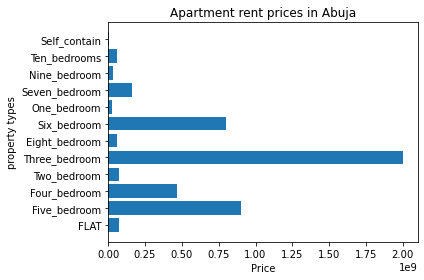

In [181]:
#create plots 
#barchart
from matplotlib import pyplot as plt

property_types = df['name']
cost = df['apartment_price']

plt.barh(property_types, cost)
plt.title('Apartment rent prices in Abuja')
plt.ylabel('property types')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

In [300]:
df['apartment_price'].astype(int)

0         3500000
1         5000000
2         7000000
3        40000000
4        16000000
           ...   
10953     2500000
10954     2000000
10955     1300000
10956     1700000
10957    24000000
Name: apartment_price, Length: 10091, dtype: int32

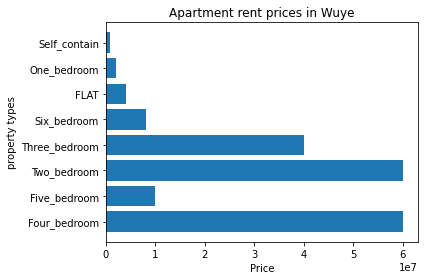

In [193]:
#charts for prices of apartments in wuye, wuse
property_wuye = Wuye_df['name']
cost_wuye = Wuye_df['apartment_price']

#property_wuye.reverse()
#cost_wuye.reverse()

plt.barh(property_wuye, cost_wuye)
plt.title('Apartment rent prices in Wuye')
plt.ylabel('property types')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

In [190]:
#convert pandas series to list
property_lis = Wuye_df['name'].tolist()
price_lis = Wuye_df['apartment_price'].tolist()

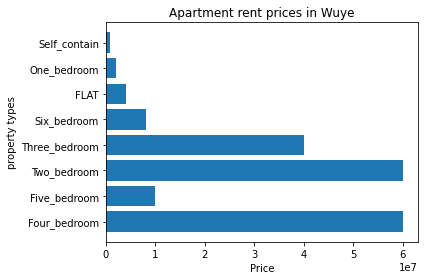

In [198]:

plt.barh(property_lis,price_lis)
plt.title('Apartment rent prices in Wuye')
plt.ylabel('property types')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

In [195]:
df['apartment_price'] = df['apartment_price'].astype(int)

In [197]:
Wuye_df = Wuye_df['apartment_price'].astype(int)

In [ ]:
#create pie chart